# k Nearest Neighbors
## Classification
Реализуйте алгоритм к ближайших соседей. 
Создадим искуственный набор данных из 100 наблюдений с 3 классами.
Необходимо реализовать функцию на входе которой:
- тренировочный набор данных (признаки и метки классов);
- тестовый набор данных (признаки);
- $k$ - количество ближайших соседей.

На выходе функция должна возвращать метки тестового набора данных. 
В качестве расстояния между объектами следует использовать Эвклидову меру.

**Алгоритм к ближайших соседей:**

Для каждого объекта тестового набора данных:
1. вычисление расстояний между всеми объектами тренировочного набора;
2. определение $k$ наименьших расстояний;
3. определение классов для $k$ найденных объектов;
4. присваивание метки тестовому объекту класса, который превалирует среди найденных объектов.

В многоклассовой модели может возникнуть неопределенность, что в 3 найденных объектак будут присутсвовать разные классы. В этом случае необходимо присваивать класс случайным образом.

In [5]:
import matplotlib.pyplot as plt
import math
import random
from sklearn.datasets import make_blobs
from collections import Counter
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
X, Y = make_blobs(n_samples = 100, n_features=2, centers=3, cluster_std = 2, random_state=17)

Text(0.5,1,'Initial data')

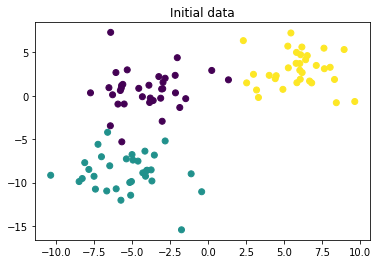

In [3]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Initial data')

In [30]:
def distance(pointA,pointB):
    #dist = 0
    #for i in range(2):
        #dist = dist + (pointA[i]-pointB[i])**2  
    #return math.sqrt(dist)
    return np.linalg.norm(pointA-pointB)

In [33]:
def list_distance(x_train,point,k):
    distances = []
    i = 0
    for x in x_train:        
        distances.append([i,distance(x,point)])
        i=i+1
    distances.sort(key=lambda x:x[1])
    return list(map(lambda x: x[0],distances[:k]))

In [6]:
def def_category(categories):
    counts = Counter(categories)
    maximum = max(counts.values())
    m_common = counts.most_common(1)[0][0]                    
    return m_common

In [12]:
def funct_kNN(x_train, y_train, x_test, k):
    y_test = []
    for test_p in x_test:
        neib = list_distance(x_train,test_p,k)        
        neib_categs = list(map(lambda i: y_train[i],neib))
        category = def_category(neib_categs)
        y_test.append(category)    
    return np.array(y_test)

Для корректного анализа построенного классификатора, разбейте исходный набор данных на тренировочный и тестовый.
Проверьте качество классификации для различных параметров $k$ (1, 3, 5, 7, 9) метрикой точность (Accuracy). Точность это отношение количества правильно классифицированных объектов ко всему количеству объектов.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
for k in (1, 3, 5, 7, 9):
    y = funct_kNN(X_train, y_train, X_test, k)
    print('k = ' + str(k) + ' accuracy = ' + str(accuracy_score(y_test, y)))

k = 1 accuracy = 0.94
k = 3 accuracy = 0.98
k = 5 accuracy = 0.98
k = 7 accuracy = 0.96
k = 9 accuracy = 0.96


Для 1 соседей


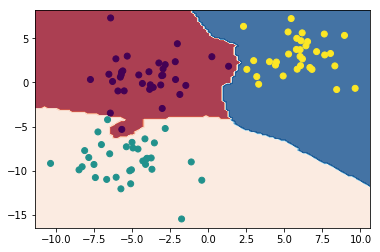

Для 3 соседей


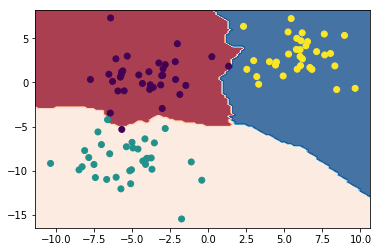

Для 5 соседей


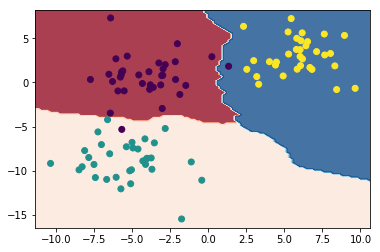

Для 7 соседей


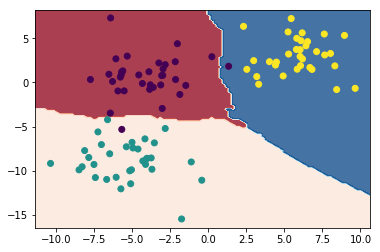

Для 9 соседей


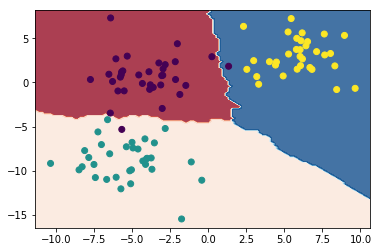

In [11]:
def razdelenie(k):
    h = 0.2
    x_min, x_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
    y_min, y_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = funct_kNN(X, Y, np.stack((xx.ravel(),yy.ravel())).transpose(), k).reshape(xx.shape)
    plt.contourf(xx, yy, Z,  cmap=plt.cm.RdBu, alpha=.8)
    plt.scatter(X[:,0], X[:,1], c = Y)      
    plt.show()

for k in (1, 3, 5, 7, 9):
    print('Для', k, 'соседей')
    razdelenie(k)

Постройте разделающие поверхности, которые строит классификатор

## Regression
Напишите функцию для регрессии методом к ближайших соседей.

Для проверки вашего регрессионной модели создайте функцию синуса в диапазоне [0, 5] и возьмите в этом диапазоне 10 случайных точек как тренеровочную выборку. 
Задача: предсказать функцию на всем диапазоне [0, 5] для всех возможных значений параметра $k$.

$y = sin(x)$

**Алгоритм регрессии:**

Для каждого тестового обекта:
1. вычисление расстояний между всеми тренировочными объектами (можно использовать просто разницу по модулю между признаками объектов, так как у нас всего один признак в задаче);
2. нахождение $k$ объектов с минимальными расстояниями;
3. вычисление среднего значения по к найденным объектам и присваивание этого значения тестовому объекту.

In [31]:
# code here
def func_kNN_regr(x_train, y_train, x_test, k):
    y_test = []
    for test_p in x_test:
        neib = list_distance(x_train,test_p,k)
        close_meanings = [y_train[i] for i in neib]        
        y_test.append(np.mean(close_meanings))
    return y_test

In [34]:
from math import sin 
from sklearn.metrics import mean_absolute_error
x = np.linspace(0.0,5.0,100)
y = np.sin(x)
x_train, x_test, y_train1, y_test1 = train_test_split(x, y, train_size=0.1)
for k in [1,3, 5, 7, 9]:
    m = func_kNN_regr(x_train, y_train1, x_test, k)
    print('k = ' + str(k) + ' accuracy = ' + str(mean_absolute_error(y_test1, m)))

k = 1 accuracy = 0.14521096713253462
k = 3 accuracy = 0.24919165340525887
k = 5 accuracy = 0.32159412420899486
k = 7 accuracy = 0.44265661322840627
k = 9 accuracy = 0.5645101556208477


C:\Users\student\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Постройте на одном графике исходную функцию, тренировочные объекты и предсказанные функции для каждого значения $k$.

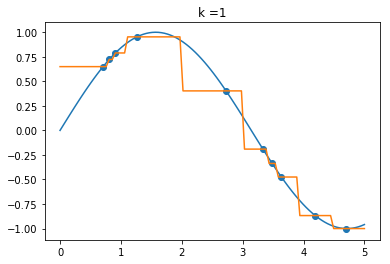

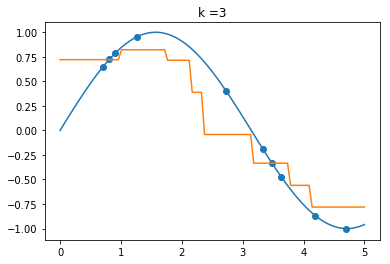

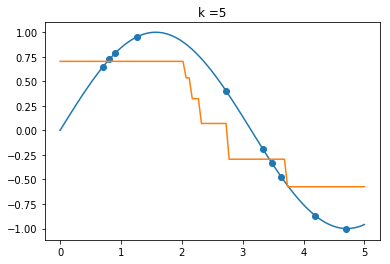

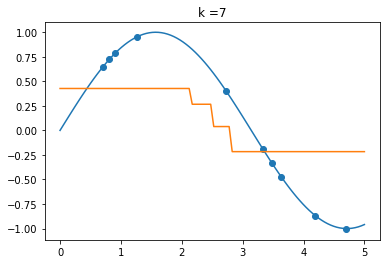

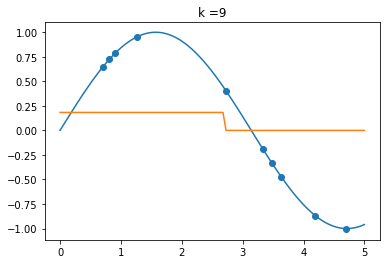

In [35]:
for k in [1,3,5,7,9]:
    n = func_kNN_regr(x_train,y_train1,x,k)
    plt.scatter(x_train,y_train1)
    plt.plot(x,y)
    plt.plot(x,n)
    plt.title('k =' + str(k))
    plt.show()